# Plotting and Visualization

This notebook example demonstrates how to create various plots using the visualization functions in **MASSpy**.

All visualization methods in **MASSpy** utilize **matplotlib** for creating and manipulating plots. Plots generated by **MASSpy** can be subjected to various **matplotlib** methods before and after generating the plot.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import mass.test
from mass import MassConfiguration, Simulation

mass_config = MassConfiguration()
mass_config.decimal_precision = 12  # Round after 12 digits after decimal
model = mass.test.create_test_model("Glycolysis")

## Quickly Viewing Simulation Results

A simulation is performed with a perturbation in order to generate output to plot.

In [2]:
simulation = Simulation(model, verbose=True)
simulation.find_steady_state(model, strategy="simulate",
                             decimal_precision=True)
conc_sol, flux_sol = simulation.simulate(
    model, time=(0, 1000),
    perturbations={"kf_ATPM": "kf_ATPM * 1.5"},
    decimal_precision=True)

Successfully loaded MassModel 'Glycolysis' into RoadRunner.


Simulation results can be quickly rendered into a time profile using the `MassSolution.view_time_profile()` method.

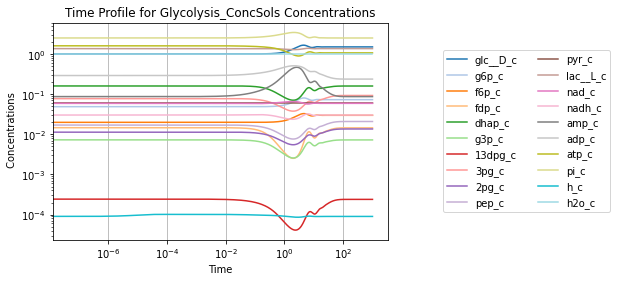

In [3]:
conc_sol.view_time_profile()

However, this method does not provide any flexibility or control over the plot that is generated. For more control over the plotting process, the various methods of the `visualization` submodule can be used.

## Time Profiles

Time profiles of simulation results are created using the `plot_time_profile()` function.

In [4]:
from mass.visualization.time_profiles import (
    plot_time_profile, get_time_profile_default_kwargs)

The minimal input required is a `MassSolution` object:

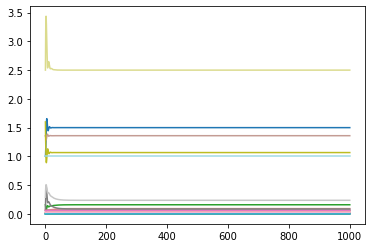

In [5]:
plot_time_profile(conc_sol);

A linear x-axis and a linear y-axis are used by default. The `plot_function` kwarg is used to change the scale of the axes. For example, to view the plot with a linear x-axis and a logarithmic y-axis:

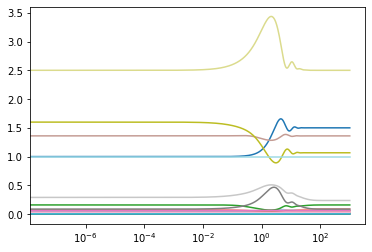

In [6]:
plot_time_profile(conc_sol, plot_function="semilogx");

A legend can be added to the plot simply by passing a valid legend location to the `legend` argument (valid legend locations can be found [here](../autoapi/mass/visualization/index.rst)). Solution labels correspond to `MassSolution` keys.

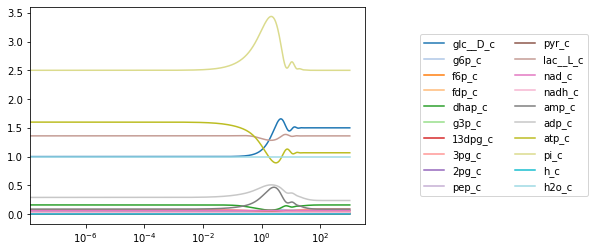

In [7]:
plot_time_profile(conc_sol, plot_function="semilogx",
                  legend="right outside");

Legend entries can be changed from their defaults by passing an iterable containing legend labels. The format must be `(labels, location)`, and the number of labels must correspond to the number of new items being plotted.

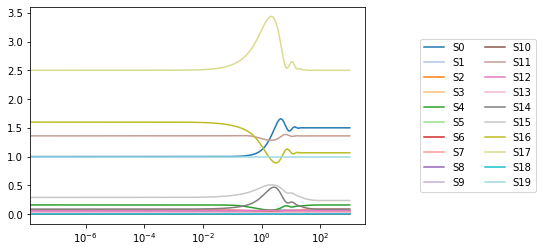

In [8]:
labels = ["S" + str(i) for i in range(len(conc_sol.keys()))]
plot_time_profile(conc_sol, plot_function="semilogx",
                  legend=(labels, "right outside"));

Whenever a plot is generated, the `Axes` containing the plot is returned by the plotting function. If a plot is created and no `Axes` object is provided, the most current `Axes` instance is used and returned.

An `Axes` instance for plotting can be provided to the `ax` argument, allowing for multiple plots to be placed on a single figure.

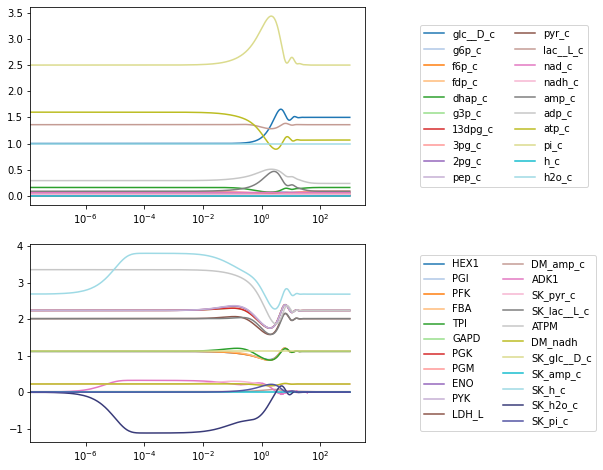

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Concentration solutions
plot_time_profile(
    conc_sol, ax=ax1, legend="right outside",
    plot_function="semilogx");

# Flux solutions
plot_time_profile(
    flux_sol, ax=ax2, legend="right outside",
    plot_function="semilogx");

Axes labels and a title are set at the time of plotting using the `xlabel`, `ylabel`, and `title` kwargs. Each argument takes either a `str` for the label or a tuple that contains the label and a `dict` of font properties. The `Figure.tight_layout()` method is used to prevent overlapping labels.

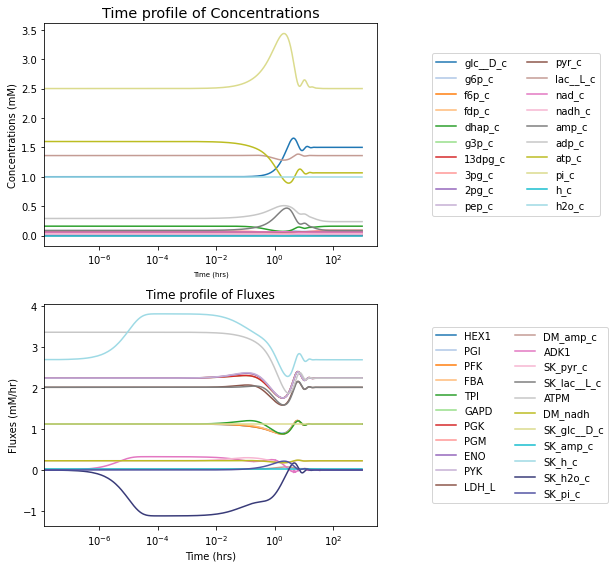

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 8))

# Concentration solutions
plot_time_profile(
    conc_sol, ax=ax1, legend="right outside",
    plot_function="semilogx",
    xlabel=("Time (hrs)", {"size": "x-small"}),
    ylabel=("Concentrations (mM)", {"size": "medium"}),
    title=("Time profile of Concentrations", {"size": "x-large"}));

# Flux solutions
plot_time_profile(
    flux_sol, ax=ax2, legend="right outside",
    plot_function="semilogx",
    xlabel="Time (hrs)",
    ylabel="Fluxes (mM/hr)",
    title="Time profile of Fluxes");
fig.tight_layout()

The `observable` argument is used to view a subset of solutions. The `observable` argument requires an iterable of strings or objects with identifiers that correspond to `MassSolution` keys. Both are shown below:

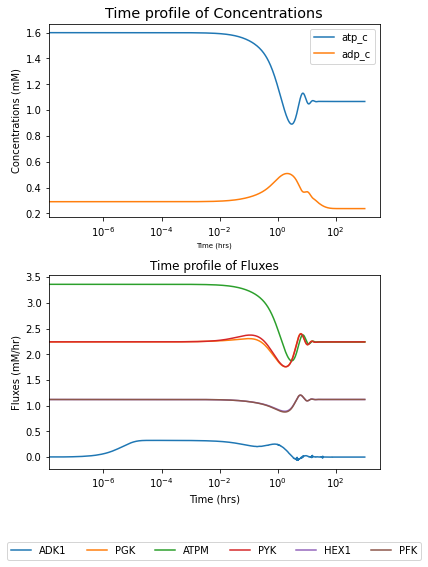

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

# Concentration solutions
plot_time_profile(
    conc_sol,
    observable=["atp_c", "adp_c"],  # Using strings
    ax=ax1, legend="best",
    plot_function="semilogx",
    xlabel=("Time (hrs)", {"size": "x-small"}),
    ylabel=("Concentrations (mM)", {"size": "medium"}),
    title=("Time profile of Concentrations", {"size": "x-large"}));

# Flux solutions
plot_time_profile(
    flux_sol,
    observable=list(model.metabolites.atp_c.reactions),  # Using objects
    ax=ax2, legend="lower outside",
    plot_function="semilogx",
    xlabel="Time (hrs)",
    ylabel="Fluxes (mM/hr)",
    title="Time profile of Fluxes",
    legend_ncol=6);
fig.tight_layout()

To view how solutions deviate from their initial value (i.e., `MassModel.initial_conditions` for concentrations and `MassModel.steady_state_fluxes` for fluxes), the `deviation` kwarg can be set as `True`.

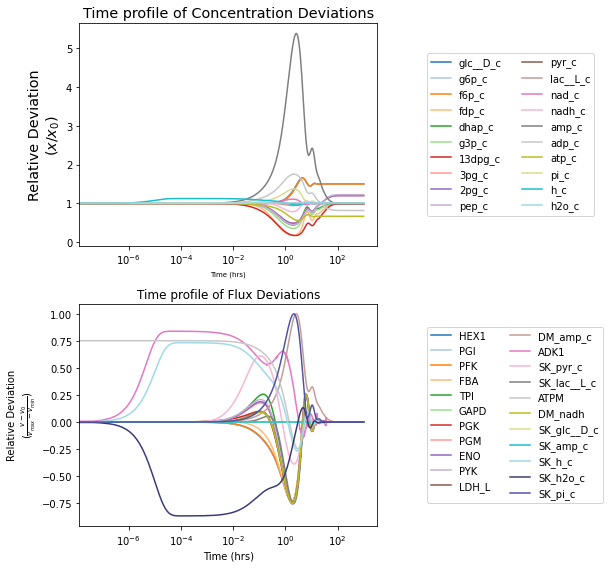

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 8))

# Concentration solutions
plot_time_profile(
    conc_sol, ax=ax1, legend="right outside",
    plot_function="semilogx",
    xlabel=("Time (hrs)", {"size": "x-small"}),
    ylabel=("Relative Deviation\n" + r"($x/x_{0}$)",
            {"size": "x-large"}),
    title=("Time profile of Concentration Deviations",
           {"size": "x-large"}),
    deviation=True,
    deviation_normalization="initial value" # divide by initial value
);

# Flux solutions
plot_time_profile(
    flux_sol, 
    ax=ax2, legend="right outside",
    plot_function="semilogx",
    xlabel="Time (hrs)",
    ylabel=("Relative Deviation\n" +\
            r"($\frac{v - v_{0}}{v_{max} - v_{min}}$)"),
    title="Time profile of Flux Deviations",
    deviation=True,
    deviation_zero_centered=True,   # Center deviation around 0
    deviation_normalization="range" # divide by value range
);
fig.tight_layout()

All possible kwargs and their default values for functions of the `mass.visualization.time_profiles` submodule can be retrieved using the `get_time_profile_default_kwargs()` function:

In [13]:
sorted(get_time_profile_default_kwargs(
    function_name="plot_time_profile"))

['annotate_time_points',
 'annotate_time_points_color',
 'annotate_time_points_labels',
 'annotate_time_points_legend',
 'annotate_time_points_marker',
 'annotate_time_points_markersize',
 'annotate_time_points_zorder',
 'color',
 'deviation',
 'deviation_normalization',
 'deviation_zero_centered',
 'grid',
 'grid_color',
 'grid_linestyle',
 'grid_linewidth',
 'legend_ncol',
 'linestyle',
 'linewidth',
 'marker',
 'markersize',
 'plot_function',
 'prop_cycle',
 'time_vector',
 'title',
 'xlabel',
 'xlim',
 'xmargin',
 'ylabel',
 'ylim',
 'ymargin',
 'zorder']

See the [visualization](../autoapi/mass/visualization/index.rst) submodule documentation for more information on possible kwargs.

## Phase Portraits

To plot phase portraits of dynamic responses against each other, use the `plot_phase_portrait()` function. 

In [14]:
from mass.visualization.phase_portraits import (
    plot_tiled_phase_portraits, plot_phase_portrait,
    get_phase_portrait_default_kwargs)

The minimal input for a phase portrait includes a `MassSolution` object and two solution keys.

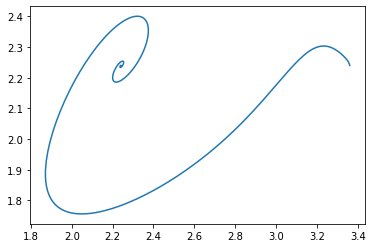

In [15]:
plot_phase_portrait(
    flux_sol,
    x="ATPM",  # Using a string
    y=model.reactions.GAPD,  # Using an object
);

As with time profiles, the `plot_phase_portrait()` function has an `ax` argument that takes an `Axes` instance and a `legend` argument for legend labels and position. A title and axes labels also can be placed on the plot.

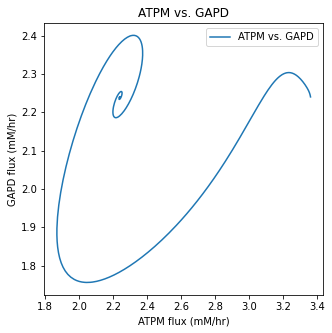

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_phase_portrait(
    flux_sol, x="ATPM", y="GAPD", ax=ax, legend="best",
    xlabel="ATPM flux (mM/hr)", ylabel="GAPD flux (mM/hr)", 
    title=("ATPM vs. GAPD", {"size": "large"}));

The `color` and `linestyle` kwargs are used to set the line color and style.

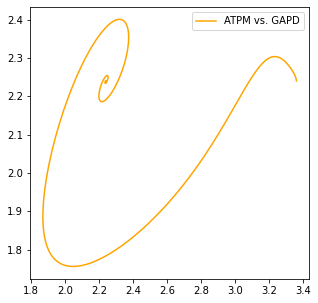

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_phase_portrait(
    flux_sol, x="ATPM", y="GAPD", ax=ax, legend="best",
    color="orange", linestyle="-");

Axes limits are set using the `xlim` and `ylim` arguments with tuples of format `(minimum, maximum)`.

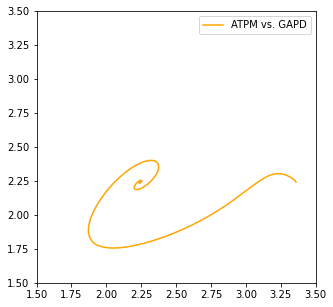

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_phase_portrait(
    flux_sol, x="ATPM", y="GAPD", ax=ax, legend="best",
    color="orange", linestyle="-",
    xlim=(1.5, 3.5), ylim=(1.5, 3.5));

To call out a particular time point in the solution, the `annotate_time_points` kwarg is used with a list of time points to annotate. There are kwargs, such as `annotate_time_points_color` and `annotate_time_points_legend`, that allow for some customization of the annotated time points.

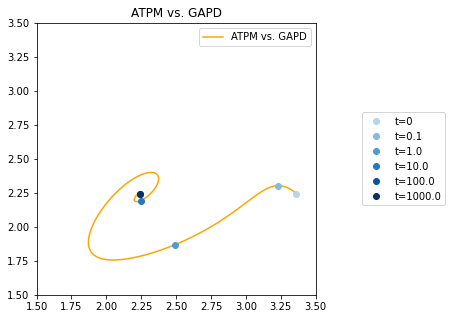

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Createt time points and colors for the time points
time_points = [0, 1e-1, 1e0, 1e1, 1e2, 1e3]
time_point_colors = [
    mpl.colors.to_hex(c)
    for c in mpl.cm.Blues(np.linspace(0.3, 1, len(time_points)))]

# Plot the phase portrait
plot_phase_portrait(
    flux_sol, x="ATPM", y="GAPD", ax=ax, legend="upper right",
    xlim=(1.5, 3.5), ylim=(1.5, 3.5),
    title="ATPM vs. GAPD",
    color="orange", linestyle="-",
    annotate_time_points=time_points,
    annotate_time_points_color=time_point_colors,
    annotate_time_points_legend="right outside");

Because all figures are generated using **matplotlib**, additional lines can be plotted, and annotations can be placed on the plot using various **matplotlib** methods.

Text(0.05, 0.9, 'Efflux > Influx')

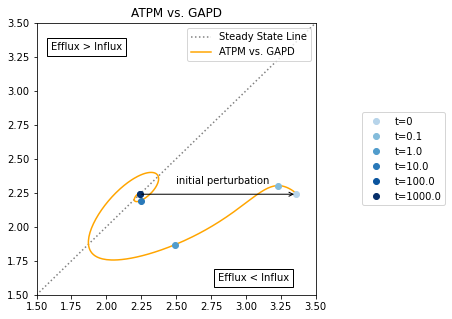

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Plot a line representing steady state
ax.plot([1.5, 3.5], [1.5, 3.5], label="Steady State Line",
        color="grey", linestyle=":")

# Plot the phase portrait
plot_phase_portrait(
    flux_sol, x="ATPM", y="GAPD", ax=ax, legend="upper right",
    xlim=(1.5, 3.5), ylim=(1.5, 3.5),
    title="ATPM vs. GAPD",
    color="orange", linestyle="-",
    annotate_time_points=time_points,
    annotate_time_points_color=time_point_colors,
    annotate_time_points_legend="right outside");

# Annotate arrow for initial perturbation
xy = (flux_sol["ATPM"][0],
      flux_sol["GAPD"][0])
xytext = (model.reactions.get_by_id("ATPM").steady_state_flux,
          model.reactions.get_by_id("GAPD").steady_state_flux)
ax.annotate("", xy=xy,
            xytext=xytext, textcoords="data",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"));
# Add arrow label
ax.annotate(
    "initial perturbation", xy=xy, xytext=(-120, 10),
    textcoords="offset pixels");
# Add text about the behavior on each side of the steady state line
ax.annotate(
    "Efflux < Influx", xy=(0.65, 0.05), xycoords="axes fraction",
    bbox=dict(fc="white", ec="black"));
ax.annotate(
    "Efflux > Influx", xy=(0.05, 0.9), xycoords="axes fraction",
    bbox=dict(fc="white", ec="black"));

All possible kwargs and their default values for the functions of the `mass.visualization.phase_portraits` submodule can be retrieved using the `get_phase_portrait_default_kwargs()` function:

In [21]:
sorted(get_phase_portrait_default_kwargs(
    function_name="plot_phase_portrait"))

['annotate_time_points',
 'annotate_time_points_color',
 'annotate_time_points_labels',
 'annotate_time_points_legend',
 'annotate_time_points_marker',
 'annotate_time_points_markersize',
 'annotate_time_points_zorder',
 'color',
 'deviation',
 'deviation_normalization',
 'deviation_zero_centered',
 'grid',
 'grid_color',
 'grid_linestyle',
 'grid_linewidth',
 'legend_ncol',
 'linestyle',
 'linewidth',
 'marker',
 'markersize',
 'plot_function',
 'prop_cycle',
 'time_vector',
 'title',
 'xlabel',
 'xlim',
 'xmargin',
 'ylabel',
 'ylim',
 'ymargin',
 'zorder']

See the [visualization](../autoapi/mass/visualization/index.rst) submodule documentation for more information on possible kwargs.

## Plotting Comparisons

To compare two sets of data in **MASSpy**, use the `plot_comparison()` function.

In [22]:
from mass.visualization.comparison import (
    plot_comparison, get_comparison_default_kwargs)

model_2 = mass.test.create_test_model("textbook")

The `plot_comparison()` function requires two objects and a string that indicates what to compare. For example, to compare the steady state fluxes between two `MassModel` objects:

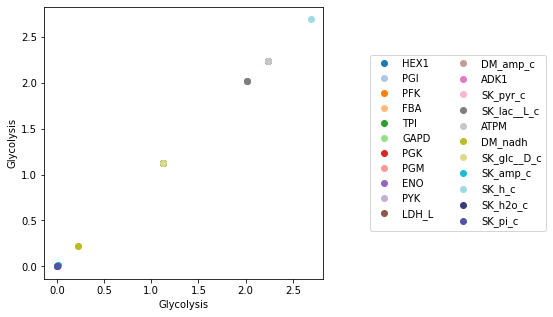

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

plot_comparison(
    x=model, y=model, compare="fluxes",
    ax=ax, legend="right outside",
    plot_function="plot",
    xlabel=model.id, ylabel=model.id);

By providing an iterable of object identifiers to the `observable` argument, the plotted results are filtered, which is especially useful when comparing the similar variables in different objects. The `xy_line` kwarg is used to add a "perfect" fit line to the visualization. For example, to compare concentrations of two different models, each containing glycolytic species:

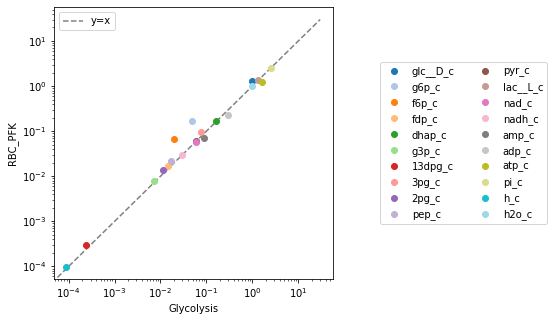

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Plot species from glycolysis model only
plot_comparison(
    x=model, y=model_2, compare="concentrations",
    observable=[m.id for m in model.metabolites],
    ax=ax, legend="right outside",
    plot_function="loglog",
    xlabel=model.id, ylabel=model_2.id,
    xy_line=True, xy_legend="best");

The `plot_comparison()` function compares different objects to one another as long as the `compare` argument is given an appropriate value. In the following example, a `pandas.Series`, containing steady state concentrations of the model after an ATP utilization perturbation, is compared to model concentrations before the perturbation.

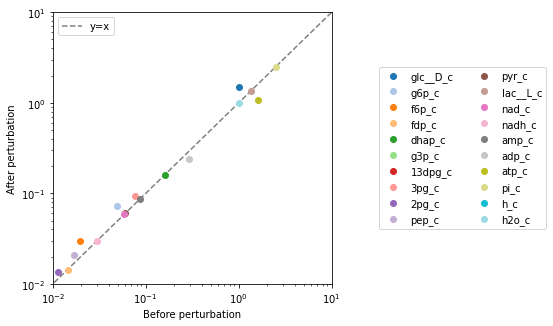

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# Create a pandas.Series to compare to the model steady state fluxes
flux_series = pd.Series(conc_sol.to_frame().iloc[-1, :])

# Compare the pandas.Series to the model steady state fluxes
# Plot species from glycolysis model only
plot_comparison(
    x=model, y=flux_series, compare="concentrations",
    ax=ax, legend="right outside",
    plot_function="loglog",
    xlabel="Before perturbation", ylabel="After perturbation",
    xlim=(1e-2, 1e1), ylim=(1e-2, 1e1),
    xy_line=True, xy_legend="best");

All possible kwargs and their default values for the functions of the `mass.visualization.comparison` submodule can be retrieved using the `get_comparison_default_kwargs()` function:

In [26]:
sorted(get_comparison_default_kwargs(
    function_name="plot_comparison"))

['color',
 'grid',
 'grid_color',
 'grid_linestyle',
 'grid_linewidth',
 'legend_ncol',
 'marker',
 'markersize',
 'plot_function',
 'prop_cycle',
 'title',
 'xlabel',
 'xlim',
 'xmargin',
 'xy_legend',
 'xy_line',
 'xy_linecolor',
 'xy_linestyle',
 'xy_linewidth',
 'ylabel',
 'ylim',
 'ymargin']

See the [visualization](../autoapi/mass/visualization/index.rst) submodule documentation for more information on possible kwargs.

## Additional Examples
For additional examples of detailed visualizations using **MASSpy**, see the following: 

* [Visualizing Catalytic Potentials of Glycolytic Regulatory Kinases](../gallery/visualization/catalytic_potential_visualizations.ipynb)